# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file =  'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_train.shape[0]

n_valid=X_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)-min(y_train)+1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Below I add shift, rotate, zoom and resize transformaitons to generate additional data.

/home/brian/tensorflow/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


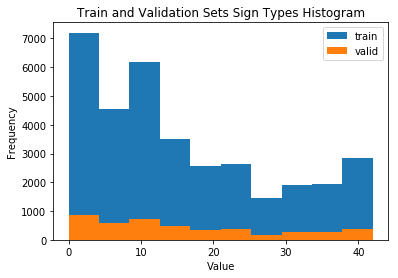

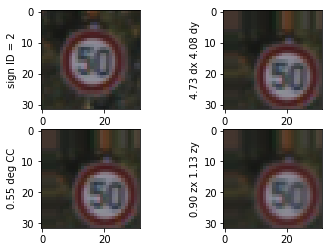

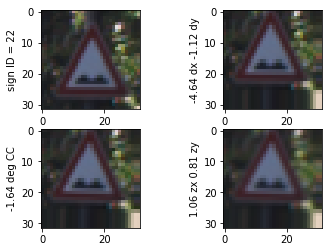

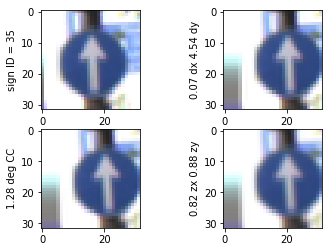

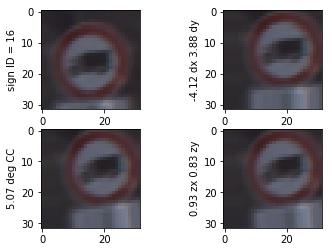

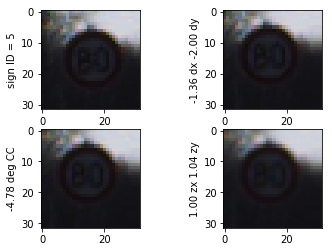

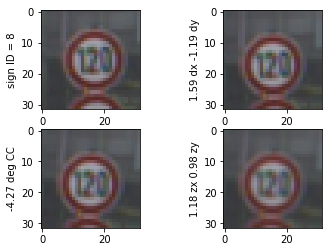

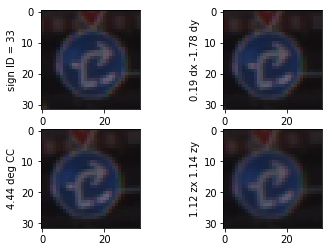

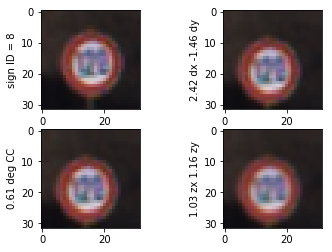

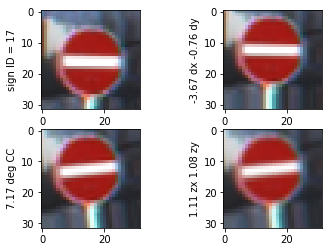

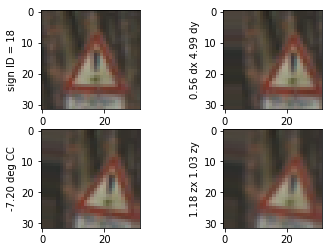

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.ndimage import rotate as rotate
from scipy.ndimage import shift as shift
from scipy.ndimage import zoom as zoom
from scipy.misc import imresize as imresize
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train, label='train')
plt.hist(y_valid,label='valid')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.title('Train and Validation Sets Sign Types Histogram')

for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    max_angle=10
    max_shift=5
    xy_shift=np.random.uniform(-max_shift,max_shift,size=2)
    xy_shift = [xy_shift[0], xy_shift[1], 0.0]

    ang=np.random.uniform(-max_angle,max_angle)

    zoom_fac=0.2
    xy_zoom=np.random.uniform(1-zoom_fac,1+zoom_fac,size=2)
    xy_zoom = [xy_zoom[0], xy_zoom[1], 1.0]

    im_shift=shift(image,xy_shift,mode='nearest')
    im_rotate = rotate(im_shift, ang, mode='nearest', reshape=False)
    im_zoom = zoom(im_rotate,xy_zoom,mode='nearest')
    im_zoom = imresize(im_zoom,size=[32,32,3])

    xy_zoom=np.random.uniform(1-zoom_fac,1+zoom_fac,size=2)
    xy_zoom = [xy_zoom[0], xy_zoom[1], 1.0]

    plt.figure(i+2)
    plt.subplot(221)
    plt.ylabel("sign ID = "+"{}".format(y_train[index]))
    plt.imshow(image)

    plt.subplot(222)
    plt.ylabel("{:.2f}".format(xy_shift[0])+" dx "+"{:.2f}".format(xy_shift[1])+" dy")
    plt.imshow(im_shift)

    plt.subplot(223)
    ylab="{:.2f}".format(ang)+" deg CC"
    plt.ylabel(ylab)
    plt.imshow(im_rotate)

    plt.subplot(224)
    plt.ylabel("{:.2f}".format(xy_zoom[0]) + " zx " + "{:.2f}".format(xy_zoom[1]) + " zy")
    plt.imshow(im_zoom)

# Generate and save additional data

In [4]:
num_new_fac = 11
new_Xshape=[round(n_train*num_new_fac),X_train.shape[1],X_train.shape[2],X_train.shape[3]]
print(new_Xshape)
new_X_train=np.ndarray(new_Xshape,dtype='uint8')
new_y_train=np.ndarray(round(n_train*num_new_fac))

for i in range(round(n_train*num_new_fac)):
    image = X_train[i%n_train]

    xy_shift=np.random.uniform(-max_shift,max_shift,size=2)
    xy_shift = [xy_shift[0], xy_shift[1], 0.0]

    ang=np.random.uniform(-max_angle,max_angle)

    xy_zoom=np.random.uniform(1-zoom_fac,1+zoom_fac,size=2)
    xy_zoom = [xy_zoom[0], xy_zoom[1], 1.0]

    im_shift=shift(image,xy_shift,mode='nearest')
    im_rotate = rotate(im_shift, ang, mode='nearest', reshape=False)
    im_zoom = zoom(im_rotate,xy_zoom,mode='nearest')
    im_zoom = imresize(im_zoom,size=[32,32,3])

    xy_zoom=np.random.uniform(1-zoom_fac,1+zoom_fac,size=2)
    xy_zoom = [xy_zoom[0], xy_zoom[1], 1.0]
    new_X_train[i]=im_zoom
    new_y_train[i]=y_train[i%n_train].astype('uint8')
    if (i%2000==0):
        print(i)

X_train_append=np.append(X_train,new_X_train,axis=0)
y_train_append=np.append(y_train,new_y_train)

del X_train
del y_train
del new_X_train
del new_y_train

np.save('X_train_append',X_train_append)
np.save('y_train_append',y_train_append)

[382789, 32, 32, 3]
0


/home/brian/tensorflow/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
190000
192000
194000
196000
198000
200000
202000
204000
206000
208000
210000
212000
214000
216000
218000
220000
222000
224000
226000
228000
230000
232000
234000
236000
238000
240000
242000
244000
246000
248000
250000
252000
254000
256000
258000
260000
262000
264000
266000
268000
270000
272000
274000
276000
278000
280000
282000
284000
286000
288000
290000
292000
294000
296000
298000
300000
302

---
## Load additional data.  

NOTE: only need to run above steps once

In [1]:
#training_file = 'train.p'
import numpy as np
import pickle as pickle
import tensorflow as tf
import random

X_train=np.load('X_train_append.npy')
y_train=np.load('y_train_append.npy')

#training_file='train.p'
#with open(training_file, mode='rb') as f:
#    train = pickle.load(f)
#X_train, y_train = train['features'], train['labels']


validation_file='valid.p'
testing_file =  'test.p'


with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(417588, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [2]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Data was pre-processed above.  Data is normalized in-line.

---
## Create Graph
The model below was inspired by the VGGnet architerure.

In [1]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 3
BATCH_SIZE = 32
rate = 0.0005
dropout = 0.25
Beta = 0.01

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    
    hin=32
    #hin must be divisible by 4
    din=3
    
    dout=16    
    fc_out=1024
    n_bins=43
    
    hfc=round(hin/4)

    x = tf.map_fn(lambda img: tf.image.per_image_standardization(img), x)

    conv11_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv11_b = tf.Variable(tf.zeros(dout))
    conv11   = tf.nn.relu(tf.nn.conv2d(x, conv11_W, strides=[1, 1, 1, 1], padding='SAME') + conv11_b)
    din=dout    
    
    conv12_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv12_b = tf.Variable(tf.zeros(dout))
    conv12   = tf.nn.relu(tf.nn.conv2d(conv11, conv12_W, strides=[1, 1, 1, 1], padding='SAME') + conv12_b)
    din=dout 
    
    conv13_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv13_b = tf.Variable(tf.zeros(dout))
    conv13   = tf.nn.relu(tf.nn.conv2d(conv12, conv13_W, strides=[1, 1, 1, 1], padding='SAME') + conv13_b)
    din=dout 
    
    conv14_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv14_b = tf.Variable(tf.zeros(dout))
    conv14   = tf.nn.relu(tf.nn.conv2d(conv13, conv14_W, strides=[1, 1, 1, 1], padding='SAME') + conv14_b)
    din=dout 
    
    pool1 = tf.nn.max_pool(conv14, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    dout=dout*2
    conv21_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv21_b = tf.Variable(tf.zeros(dout))
    conv21   = tf.nn.relu(tf.nn.conv2d(pool1, conv21_W, strides=[1, 1, 1, 1], padding='SAME') + conv21_b)
    din=dout    
    
    conv22_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv22_b = tf.Variable(tf.zeros(dout))
    conv22   = tf.nn.relu(tf.nn.conv2d(conv21, conv22_W, strides=[1, 1, 1, 1], padding='SAME') + conv22_b)
    din=dout 
    
    conv23_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv23_b = tf.Variable(tf.zeros(dout))
    conv23   = tf.nn.relu(tf.nn.conv2d(conv22, conv23_W, strides=[1, 1, 1, 1], padding='SAME') + conv23_b)
    din=dout 
    
    conv24_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv24_b = tf.Variable(tf.zeros(dout))
    conv24   = tf.nn.relu(tf.nn.conv2d(conv23, conv24_W, strides=[1, 1, 1, 1], padding='SAME') + conv24_b)
    din=dout 
    
    pool2 = tf.nn.max_pool(conv24, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    dout=dout*2
    conv31_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv31_b = tf.Variable(tf.zeros(dout))
    conv31   = tf.nn.relu(tf.nn.conv2d(pool2, conv31_W, strides=[1, 1, 1, 1], padding='SAME') + conv31_b)
    din=dout    
    
    conv32_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv32_b = tf.Variable(tf.zeros(dout))
    conv32   = tf.nn.relu(tf.nn.conv2d(conv31, conv32_W, strides=[1, 1, 1, 1], padding='SAME') + conv32_b)
    din=dout 
    
    conv33_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv33_b = tf.Variable(tf.zeros(dout))
    conv33   = tf.nn.relu(tf.nn.conv2d(conv32, conv33_W, strides=[1, 1, 1, 1], padding='SAME') + conv33_b)
    din=dout 
    
    conv34_W = tf.Variable(tf.truncated_normal(shape=(3, 3, din, dout), mean = mu, 
                                               stddev = tf.sqrt(tf.divide(2,3*3*din))))
    conv34_b = tf.Variable(tf.zeros(dout))
    conv34   = tf.nn.relu(tf.nn.conv2d(conv33, conv34_W, strides=[1, 1, 1, 1], padding='SAME') + conv34_b)
    din=dout 

    fc0   = flatten(conv34)
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(hfc*hfc*din, fc_out), mean = mu, 
                                            stddev = tf.sqrt(tf.divide(2,hfc*hfc*din))))
    fc1_b = tf.Variable(tf.zeros(fc_out))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    fc2_W  = tf.Variable(tf.truncated_normal(shape=(fc_out, fc_out), mean = mu, 
                                             stddev = tf.sqrt(tf.divide(2,fc_out))))
    fc2_b  = tf.Variable(tf.zeros(fc_out))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(fc_out, n_bins), mean = mu, 
                                             stddev = tf.sqrt(tf.divide(2,fc_out))))
    fc3_b  = tf.Variable(tf.zeros(n_bins))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, fc1_W, fc2_W, fc3_W

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)
logits, fc1_W, fc2_W, fc3_W = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels= one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)+Beta*(tf.nn.l2_loss(fc1_W)+tf.nn.l2_loss(fc2_W)+tf.nn.l2_loss(fc3_W))
#loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
logit_operation=logits

def get_logits(X_data):
    sess=tf.get_default_session()
    logits=sess.run(logit_operation,feed_dict={x: X_data,keep_prob: 1.0})
    return logits

def get_pred(X_data):
    num_examples = len(X_data)
    sess=tf.get_default_session()
    pred=np.ndarray((num_examples),dtype=int)
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        logits = sess.run(logit_operation, 
                                 feed_dict={x: batch_x, keep_prob: 1.0})
        pred_batch=np.argmax(logits,axis=1)
        pred[offset:offset+BATCH_SIZE]=pred_batch
    return pred

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss=0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy,loss = sess.run([accuracy_operation, loss_operation], 
                                 feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss+=(loss*len(batch_x))
        
    return [total_accuracy / num_examples, total_loss/ num_examples]

## Train Model

In [4]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        num_examples=len(y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run([training_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        
        training_accuracy,train_loss = evaluate(X_train,y_train)    
        validation_accuracy,valid_loss = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Loss       = {:.3f}".format(train_loss))
        print("Validation Loss     = {:.3f}".format(valid_loss))
        print("Training   Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Loss       = 0.803
Validation Loss     = 0.891
Training   Accuracy = 0.989
Validation Accuracy = 0.970

EPOCH 2 ...
Training Loss       = 0.583
Validation Loss     = 0.710
Training   Accuracy = 0.995
Validation Accuracy = 0.976

EPOCH 3 ...
Training Loss       = 0.608
Validation Loss     = 0.683
Training   Accuracy = 0.998
Validation Accuracy = 0.987

Model saved


In [5]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy,test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.968


# Test Results:
- Training accuracy   	= 0.998
- Validation accuracy	= 0.987
- Test accuracy		= 0.968
- Data preperation time was about 30 min.
- Training time was about 15 min for final 3 epochs.

Total of 7 tests were run of various lengths.  
For EPOCHS 3+, the average validation was 0.984
The average test result for the final EPOCH was 0.969.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

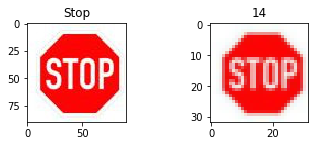

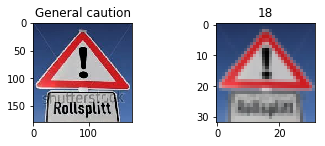

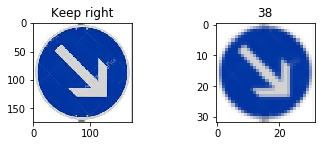

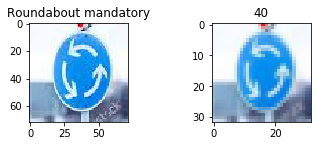

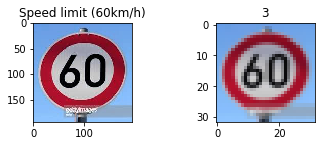

In [7]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

i=0
images=[]
desc=['Stop','General caution','Keep right','Roundabout mandatory',
'Speed limit (60km/h)']
labels=[14,18,38,40,3]
file_list=['14.jpg','18.jpg','38.jpg','40.jpg','3.jpg']
Ximg_test=np.ndarray([5,32,32,3],dtype='uint8')
yimg_test=np.ndarray(5)

%matplotlib inline
for f in file_list:
    img=np.uint8(imread(f))
    plt.figure(i)
    plt.subplot(221)
    plt.title(desc[i])
    plt.imshow(img)
    img = imresize(img,size=[32,32,3])
    plt.subplot(222)
    plt.imshow(img)
    plt.title(labels[i])
    Ximg_test[i]=img
    yimg_test[i]=labels[i]
    i=i+1
    
np.save('Ximg_test',Ximg_test)
np.save('yimg_test',yimg_test)

### Sign predictions, accuracy, and top five selections and probabilities for web images

Image test accuracy: 1.000


,0,1,2,3,4
Index,1.400000e+01,1.800000e+01,3.800000e+01,4.000000e+01,3.000000e+00
PredInd1,1.400000e+01,1.800000e+01,3.800000e+01,4.000000e+01,3.000000e+00
PredInd2,1.500000e+01,2.700000e+01,3.900000e+01,2.300000e+01,1.000000e+01
PredInd3,2.700000e+01,3.900000e+01,2.400000e+01,1.900000e+01,3.300000e+01
PredInd4,1.700000e+01,1.600000e+01,6.000000e+00,1.700000e+01,1.600000e+01
PredInd5,2.300000e+01,2.300000e+01,5.000000e+00,1.500000e+01,2.000000e+01
p1,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
p2,5.804430e-11,3.113479e-25,1.454411e-27,4.157690e-18,3.367584e-22
p3,4.419788e-11,5.877882e-26,6.355305e-28,8.881694e-19,6.123008e-23
p4,3.762339e-11,5.553488e-26,1.433857e-28,8.002055e-19,2.359297e-23


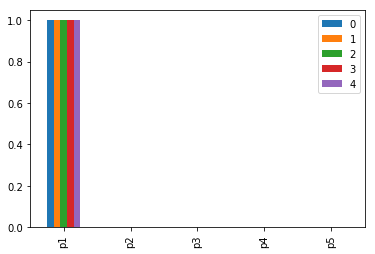

In [7]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def softmax(x):
    smax=np.amax(x,axis=1)
    e_x=np.exp(x.T-smax).T
    y=(e_x.T/e_x.sum(axis=1)).T
    return y

Ximg_test=np.load('Ximg_test.npy')
yimg_test=np.load('yimg_test.npy')

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    img_logits = get_logits(Ximg_test)
    img_prob=softmax(img_logits)
    img_top5=sess.run(tf.nn.top_k(tf.constant(img_prob), k=5))
    img_accuracy,img_loss = evaluate(Ximg_test, yimg_test)
    print("Image test accuracy: {:.3f}".format(img_accuracy))
    
np.save('Ximg_logits', img_logits)
np.save('img_top5',img_top5)
df=pd.DataFrame({'Index': yimg_test.astype(int),
     'PredInd1':img_top5[1][:,0],
     'PredInd2':img_top5[1][:,1],
     'PredInd3':img_top5[1][:,2],
     'PredInd4':img_top5[1][:,3],
     'PredInd5':img_top5[1][:,4],
     'p1':img_top5[0][:,0],
     'p2':img_top5[0][:,1],
     'p3':img_top5[0][:,2],
     'p4':img_top5[0][:,3],
     'p5':img_top5[0][:,4]
                })
dfbar=pd.DataFrame({
     'p1':img_top5[0][:,0],
     'p2':img_top5[0][:,1],
     'p3':img_top5[0][:,2],
     'p4':img_top5[0][:,3],
     'p5':img_top5[0][:,4]
                })
df=df.transpose()
dfbar=dfbar.transpose()
dfbar.plot.bar()
df

In [11]:
df.to_csv('web_images.csv')

Each sign has a clear image. As a result, the network was extremely confident in its predictions.

###  Sign predictions, accuracy, and top five selections and probabilities for selected test images

Image test accuracy: 0.900


,0,1,2,3,4,5,6,7,8,9
Index,1.100000e+01,36.0,1.000000e+00,1.500000e+01,11.000000,1.200000e+01,3.400000e+01,3.300000e+01,2.100000e+01,0.000000e+00
PredInd1,1.100000e+01,36.0,1.000000e+00,1.500000e+01,27.000000,1.200000e+01,3.400000e+01,3.300000e+01,2.100000e+01,0.000000e+00
PredInd2,3.900000e+01,0.0,2.000000e+00,6.000000e+00,1.000000,3.400000e+01,1.200000e+01,3.900000e+01,3.100000e+01,2.400000e+01
PredInd3,4.100000e+01,1.0,2.300000e+01,2.300000e+01,5.000000,0.000000e+00,2.100000e+01,3.000000e+00,2.400000e+01,3.300000e+01
PredInd4,3.100000e+01,2.0,6.000000e+00,3.900000e+01,21.000000,1.000000e+00,2.200000e+01,3.600000e+01,3.400000e+01,2.300000e+01
PredInd5,1.900000e+01,3.0,1.000000e+01,4.100000e+01,24.000000,2.000000e+00,1.700000e+01,2.400000e+01,2.300000e+01,3.600000e+01
p1,1.000000e+00,1.0,1.000000e+00,1.000000e+00,0.141974,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
p2,4.455793e-31,0.0,7.387050e-24,2.101948e-44,0.057575,5.380986e-43,3.178491e-22,1.301458e-29,2.221415e-17,1.019856e-15
p3,3.061017e-31,0.0,3.801423e-25,1.261169e-44,0.044987,0.000000e+00,8.923613e-24,1.137285e-29,1.190367e-17,4.119834e-16
p4,4.875300e-32,0.0,2.064662e-25,1.401298e-45,0.038802,0.000000e+00,6.913597e-24,4.498406e-30,9.196271e-18,3.988772e-16


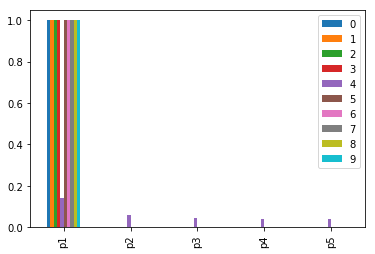

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pickle
%matplotlib inline

def softmax(x):
    smax=np.amax(x,axis=1)
    e_x=np.exp(x.T-smax).T
    y=(e_x.T/e_x.sum(axis=1)).T
    return y

testing_file =  'test.p'

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_test, y_test = test['features'], test['labels']
Ximg_test=X_test[3000:3010,:,:,:]
yimg_test=y_test[3000:3010]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    img_logits = get_logits(Ximg_test)
    img_prob=softmax(img_logits)
    img_top5=sess.run(tf.nn.top_k(tf.constant(img_prob), k=5))
    img_accuracy,img_loss = evaluate(Ximg_test, yimg_test)
    print("Image test accuracy: {:.3f}".format(img_accuracy))
    
np.save('Ximg_logits', img_logits)
np.save('img_top5',img_top5)
df=pd.DataFrame({'Index': yimg_test.astype(int),
     'PredInd1':img_top5[1][:,0],
     'PredInd2':img_top5[1][:,1],
     'PredInd3':img_top5[1][:,2],
     'PredInd4':img_top5[1][:,3],
     'PredInd5':img_top5[1][:,4],
     'p1':img_top5[0][:,0],
     'p2':img_top5[0][:,1],
     'p3':img_top5[0][:,2],
     'p4':img_top5[0][:,3],
     'p5':img_top5[0][:,4]
                })
dfbar=pd.DataFrame({
     'p1':img_top5[0][:,0],
     'p2':img_top5[0][:,1],
     'p3':img_top5[0][:,2],
     'p4':img_top5[0][:,3],
     'p5':img_top5[0][:,4]
                })
df=df.transpose()
dfbar=dfbar.transpose()
dfbar.plot.bar()
df.to_csv('test_images.csv')
df

For the one of the ten missed signs, the model was uncertain in the result.

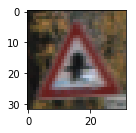

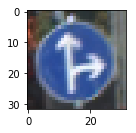

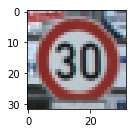

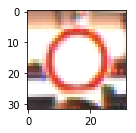

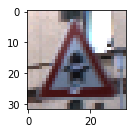

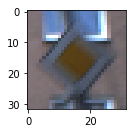

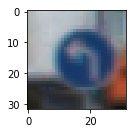

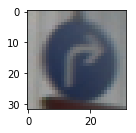

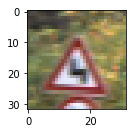

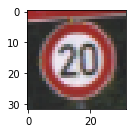

In [14]:
%matplotlib inline
testing_file =  'test.p'

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_test, y_test = test['features'], test['labels']
Ximg_test=X_test[3000:3010,:,:,:]
yimg_test=y_test[3000:3010]

for i in range(len(Ximg_test)):
    img=Ximg_test[i,:,:,:]
    plt.figure(i)
    plt.subplot(221)
    #plt.title(desc[i])
    plt.imshow(img)
    
    i=i+1

### Get predictions for test data to generate precision and recall

In [3]:
import numpy as np
import pickle

testing_file =  'test.p'

def softmax(x):
    y=np.transpose(np.transpose(np.exp(x))/
                   np.transpose(np.sum(np.exp(x),axis=1)))
    return y

testing_file =  'test.p'
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_test, y_test = test['features'], test['labels']

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    pred = get_pred(X_test)

np.save('test_pred',pred)

### Create prediction vector, count_pred, condition vector, count_y, and true vector, count_same.

In [17]:
pred=np.load('test_pred.npy')
testing_file =  'test.p'
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_test, y_test = test['features'], test['labels']

same=((pred+1)==(y_test+1))*(pred+1)-1

count_pred=np.ndarray((43),dtype=int)
count_y=np.ndarray((43),dtype=int)
count_same=np.ndarray((43),dtype=int)
for i in range(43):
    count_pred[i]=sum(pred==i)
    count_y[i]   =sum(y_test==i)
    count_same[i]=sum(same==i)

### Use Pandas to create summary data

,ClassId,SignName,Condition Positive,Predicited Positive,True Positive,Precision,Recall,F1,Prevalence
0,0,Speed limit (20km/h),60,64,60,0.937500,1.000000,0.967742,0.004751
1,1,Speed limit (30km/h),720,737,718,0.974220,0.997222,0.985587,0.057007
2,2,Speed limit (50km/h),750,767,749,0.976532,0.998667,0.987475,0.059382
3,3,Speed limit (60km/h),450,464,441,0.950431,0.980000,0.964989,0.035629
4,4,Speed limit (70km/h),660,652,652,1.000000,0.987879,0.993902,0.052257
5,5,Speed limit (80km/h),630,680,615,0.904412,0.976190,0.938931,0.049881
6,6,End of speed limit (80km/h),150,133,131,0.984962,0.873333,0.925795,0.011876
7,7,Speed limit (100km/h),450,447,446,0.997763,0.991111,0.994426,0.035629
8,8,Speed limit (120km/h),450,434,432,0.995392,0.960000,0.977376,0.035629
9,9,No passing,480,494,479,0.969636,0.997917,0.983573,0.038005


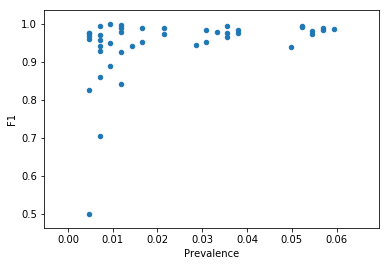

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gss=pd.read_csv('signnames.csv')
N=sum(count_pred)
gss['Condition Positive']=count_y
#gss['CN']=N-gss['CP']
gss['Predicited Positive']=count_pred
#gss['PN']=N-gss['PP']
gss['True Positive']=count_same
#gss['FP']=gss['PP']-gss['TP']
#gss['TN']=gss['CN']-gss['FP']
#gss['FN']=gss['CP']-gss['TP']
gss['Precision']=gss['True Positive']/count_pred
gss['Recall']=gss['True Positive']/count_y
gss['F1']=2*gss['Precision']*gss['Recall']/(gss['Precision']+gss['Recall'])
gss['Prevalence']=gss['Condition Positive']/N
gss.to_csv('gss.csv')
gss.plot.scatter(x='Prevalence',y='F1')
gss.to_csv('gss_sum_perf.csv')
gss

### Discussion of results
From the above summary data and F1 vs. Prevalence plot, signs that are more highly represented tended to be better predicted.  Also, the two worst performing signs -- Pedestrians and Double curve -- are both similar and have very low prevalence.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 